# Function
Consists of init, setting a learning rate, fitting, update the step. computing, caculating square loss and RMSE

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class linear_regression_MultipleD:
    
    def __init__(self):
        self.x = None
        self.y = None
        self.w = np.zeros(7 + 1) # Add one for the intercept term
        self.loss_values = []
        self.alpha = 1

    def set_learning_rate(self, alpha):
        self.alpha = alpha

    def fit(self, x, y, iteration=1500):
        self.loss_values = []
        self.y = y

        self.x = np.c_[x, np.ones(x.shape[0])]

        for i in range(iteration):
            if not self.make_one_update():
                self.set_learning_rate(self.alpha * 0.1)
            self.loss_values.append(self.sq_loss(self.w))

    def make_one_update(self):
        w_current = self.w
        step = (-1)*self.alpha*self.compute_gradient(w_current)
        w_update = w_current + step
        
        current_loss = self.sq_loss(w_current)
        update_loss = self.sq_loss(w_update)
        if current_loss > update_loss:
            print("Loss decreases to ", update_loss,)
            self.w = w_update
            return True
        else:
            print("Loss increases to ", update_loss,)
            return False

    def compute_gradient(self, w_current):
        grad_v = np.zeros(8)
        x = self.x
        y = self.y

        for j in range(8):
            grad_v[j] = 2 / len(y) * np.sum((x.dot(w_current) - y) * x[:, j])

        print("The norm of grad vector is ", np.sqrt(np.inner(grad_v, grad_v)))
        return grad_v
        
    def sq_loss(self, w):
        x = self.x
        y = self.y
        loss = np.sum((x.dot(w) - y) ** 2) / len(y)
        return loss
        pass

    def calculate_rmse(self, y_pred, y_test):
        y = self.y
        rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
        return rmse

In [232]:
def split(x, y, test_size=0.2, random_state = np.random.randint(1, 1000)):
        n_samples = x.shape[0]
        
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        
        n_test_samples = int(test_size * n_samples)
        
        test_indices = indices[:n_test_samples]
        train_indices = indices[n_test_samples:]    
        
        x_train = x[train_indices]
        x_test = x[test_indices]
        y_train = y[train_indices]
        y_test = y[test_indices]
        
        return x_train, x_test, y_train, y_test

# Dataset

In [233]:
df = pd.read_csv('regular_season_2022-23.csv', encoding='ISO-8859-1', sep=';')
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
676,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
677,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


Here are all the columns in the dataset

In [234]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

check for a null/missing value

In [235]:
df.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

We will exclusively utilize the following features for our linear regression analysis:
1) MP: Minutes played per game.
2) FG: Field goals made per game.
3) FGA: Field goals attempted per game.
4) FG%: Field goal percentage, i.e., the ratio of field goals made to attempted.
5) 3P%: Three-point field goal percentage.
6) 2P%: Two-point field goal percentage.
7) FT%: Free throw percentage.

The goal is to find a model that will estimate/predict each player point per game

In [236]:
x = df[['MP', 'FG', 'FGA', 'FG%', '3P%', '2P%', 'FT%']].values
y = df['PTS'].values

x_train, x_test, y_train, y_test = split(x, y, test_size=0.2)

In [237]:

h = linear_regression_MultipleD()

h.set_learning_rate(0.001)

h.fit(x_train, y_train, iteration=1000)

The norm of grad vector is  499.6524371695238
Loss decreases to  10.378555969293663
The norm of grad vector is  52.77514049827169
Loss decreases to  9.024012701583379
The norm of grad vector is  14.6016613811454
Loss decreases to  8.826778633552903
The norm of grad vector is  13.494648963646677
Loss decreases to  8.645907997310095
The norm of grad vector is  13.324130550703636
Loss decreases to  8.469431831138607
The norm of grad vector is  13.165712559557566
Loss decreases to  8.297125548289122
The norm of grad vector is  13.009294888681755
Loss decreases to  8.128889082059187
The norm of grad vector is  12.854748923288055
Loss decreases to  7.964625977041879
The norm of grad vector is  12.702051312214964
Loss decreases to  7.804242076717274
The norm of grad vector is  12.551180075190938
Loss decreases to  7.647645456208992
The norm of grad vector is  12.402113506170874
Loss decreases to  7.494746369261252
The norm of grad vector is  12.254830158702855
Loss decreases to  7.34545719660

Let's plot a loss value for each update being made

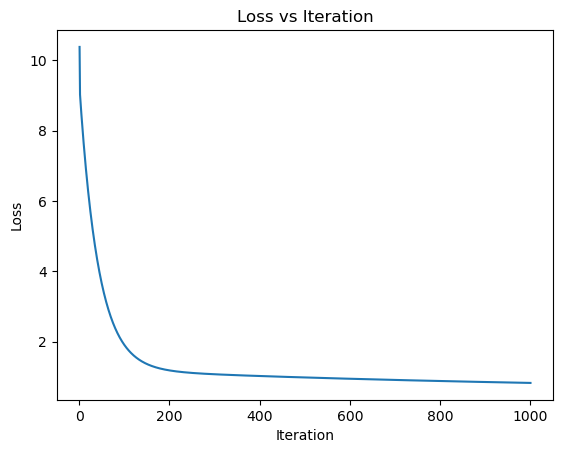

In [238]:
plt.plot(range(1, len(h.loss_values) + 1), h.loss_values)

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs Iteration')

plt.show()

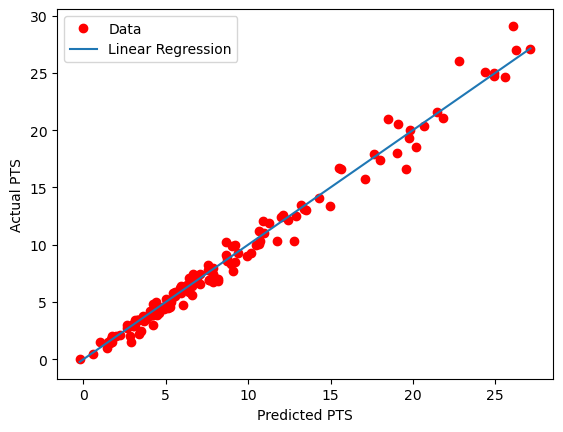

In [239]:
predicted_values = np.dot(x_test, h.w[:-1]) + h.w[-1]

plt.plot(predicted_values, y_test, 'ro', label='Data')
plt.plot(np.sort(predicted_values), np.sort(predicted_values), linestyle='solid', label='Linear Regression')

plt.xlabel('Predicted PTS')
plt.ylabel('Actual PTS')
plt.legend()

plt.show()

We used RMSE (Root Mean Square Error) to measure the performance of the model.

In [240]:
rmse = h.calculate_rmse(predicted_values, y_test)
print("RMSE:", rmse)

RMSE: 0.8389595871529761
